## 4 nodes

In [1]:
%run ../imports.py

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (1,0),
    (1,2),
    (2,3)
])

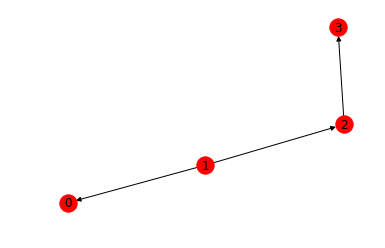

In [4]:
plt.axis('off')
nx.draw_networkx(G)

In [5]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

2

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
Q

matrix([[-0.3897,  0.7795, -0.4817,  0.092 ],
        [ 0.173 , -0.346 , -0.5598,  0.7328]])

In [8]:
sigma

array([[ 0.2363, -0.0337],
       [-0.0337,  0.5819]])

In [9]:
print(eqL)

[[ 3.3333e-01 -6.6667e-01  3.3333e-01 -1.0127e-16]
 [-6.6667e-01  1.3333e+00 -6.6667e-01  1.9776e-16]
 [ 3.3333e-01 -6.6667e-01  8.3333e-01 -5.0000e-01]
 [-1.3072e-16  1.4734e-16 -5.0000e-01  5.0000e-01]]


In [10]:
posG, negG = separate_graphs(eqL)

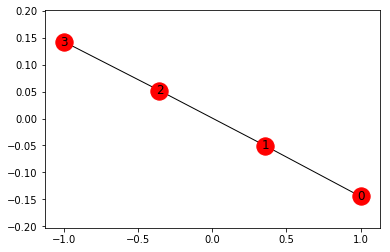

In [12]:
nx.draw_networkx(posG)

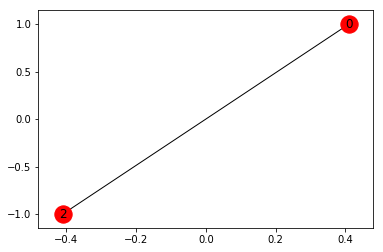

In [13]:
nx.draw_networkx(negG)